In [1]:
!pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-8s4vln1p
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-8s4vln1p
  Resolved https://github.com/tweepy/tweepy.git to commit 91a41c6e1c955d278c370d51d5cf43b05f7cd979
  Preparing metadata (setup.py) ... done


In [1]:
import tweepy
import pandas as pd
import time

# Use your Bearer Token for API v2
bearer_token = "Your Bearer Token Here"

# Create an instance of tweepy.Client using Bearer Token authentication
client = tweepy.Client(bearer_token=bearer_token)

# Search query (without unsupported operators)
search_query = "ref world cup"  # Adjust the search query as needed
no_of_tweets = 90

# Retry logic for handling rate limiting
def get_tweets():
    try:
        # Fetch recent tweets using the search_recent_tweets method
        tweets = client.search_recent_tweets(query=search_query, max_results=no_of_tweets, tweet_fields=["created_at", "public_metrics", "source", "text"], user_fields=["username"])

        # Filter out retweets and replies
        attributes_container = [
            [tweet.author_id, tweet.created_at, tweet.public_metrics['like_count'], tweet.source, tweet.text]
            for tweet in tweets.data
            if not tweet.text.startswith('RT') and not tweet.text.startswith('@')
        ]

        # Create a DataFrame to store the tweet data
        columns = ["User ID", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]
        tweets_df = pd.DataFrame(attributes_container, columns=columns)

        return tweets_df

    except tweepy.TooManyRequests as e:
        # If the rate limit is exceeded, wait for the rate limit to reset
        print("Rate limit exceeded. Waiting for reset...")
        reset_time = e.response.headers.get('x-rate-limit-reset')
        wait_time = int(reset_time) - int(time.time()) + 5  # Adding a small buffer time
        print(f"Waiting for {wait_time} seconds.")
        time.sleep(wait_time)
        return get_tweets()  # Retry the function after waiting

    except Exception as e:
        print(f"Error: {e}")
        return None

# Call the function to get tweets
tweets_df = get_tweets()

# If data is available, print it
if tweets_df is not None:
    print(tweets_df)


   User ID              Date Created  Number of Likes Source of Tweet  \
0     None 2024-11-15 10:30:00+00:00                0            None   
1     None 2024-11-15 09:52:38+00:00                1            None   
2     None 2024-11-15 09:25:44+00:00                1            None   
3     None 2024-11-15 09:23:04+00:00                0            None   
4     None 2024-11-15 09:21:46+00:00              124            None   
5     None 2024-11-15 08:44:06+00:00                0            None   
6     None 2024-11-15 07:59:43+00:00                0            None   
7     None 2024-11-15 02:24:06+00:00                4            None   
8     None 2024-11-15 00:25:48+00:00                1            None   
9     None 2024-11-14 23:27:45+00:00                1            None   
10    None 2024-11-14 23:16:34+00:00                0            None   
11    None 2024-11-14 23:14:41+00:00                0            None   
12    None 2024-11-14 23:10:43+00:00               

In [2]:
tweets_df

,User ID,Date Created,Number of Likes,Source of Tweet,Tweet
0,None,2024-11-15 10:30:00+00:00,0,None,Don't just dream of winning. Play to win on AP...
1,None,2024-11-15 09:52:38+00:00,1,None,Look at the 2001 FA Cup Final? LFC’s two goalk...
2,None,2024-11-15 09:25:44+00:00,1,None,"Messi thinking it's still the Qatar World Cup,..."
3,None,2024-11-15 09:23:04+00:00,0,None,9. A Fable of New York\n\nDo football commenta...
4,None,2024-11-15 09:21:46+00:00,124,None,Ronaldo fights with refs every game and you do...
5,None,2024-11-15 08:44:06+00:00,0,None,新テニスの王子様 U-17 WORLD CUP SEMIFINAL 第7話を視聴しました！#...
6,None,2024-11-15 07:59:43+00:00,0,None,Messi: Ain't you awarding me the penalty\nRef:...
7,None,2024-11-15 02:24:06+00:00,4,None,"Messi: ""What, no penalty?"" \nAm reporting to d..."
8,None,2024-11-15 00:25:48+00:00,1,None,Why has Messi become so ridiculously aggressiv...
9,None,2024-11-14 23:27:45+00:00,1,None,パラグアイ vs アルゼンチン【メッシスタメン / W杯南米予選】\nParaguay vs...


In [3]:
from google.colab import files
tweets_df.to_csv('tweets.csv')
files.download('tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("/content/Twitter Sentiments.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [10]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [12]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [14]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [15]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


,clean_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


In [16]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, can't, caus, they, don'..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, societi, #motiv]"


In [17]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [18]:
# !pip install wordcloud

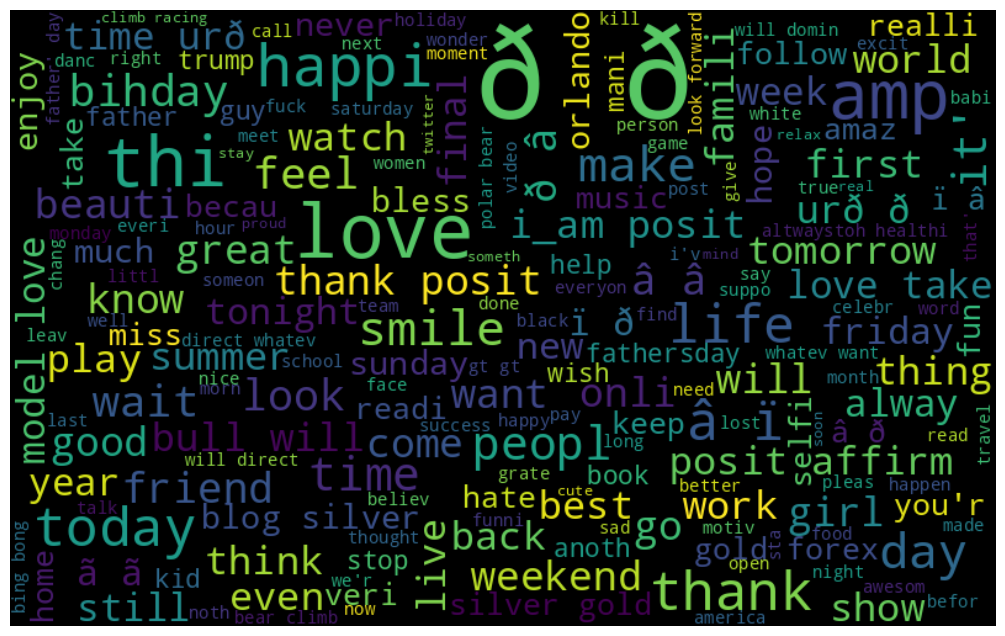

In [19]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

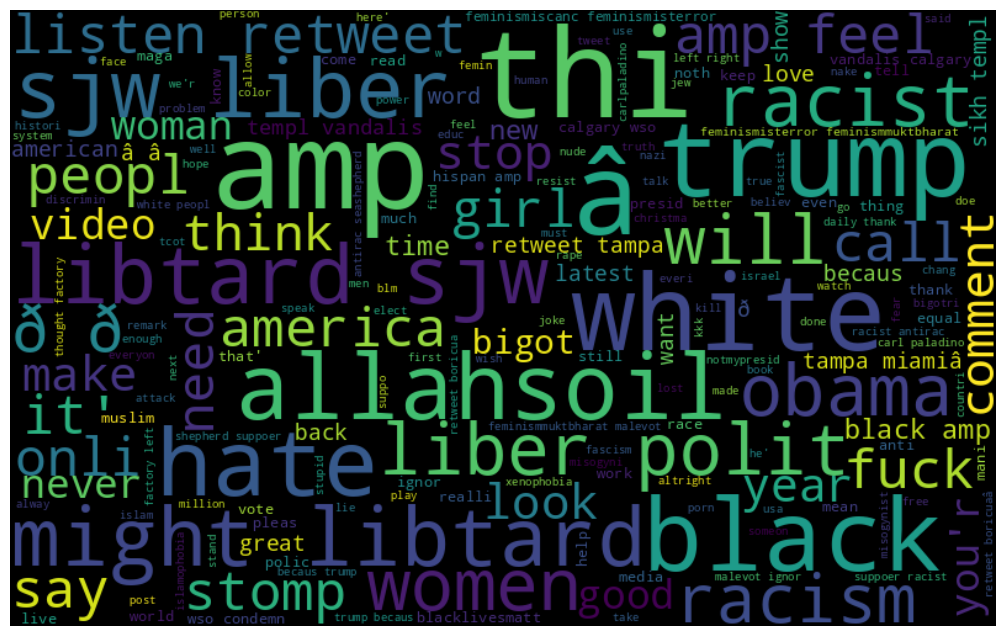

In [35]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [ ]:

# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [ ]:
ht_positive[:5]

In [ ]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [ ]:
ht_positive[:5]

In [ ]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

In [ ]:

# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [37]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [44]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [45]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.5041420118343195

In [48]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.5584541062801932

In [49]:
accuracy_score(y_test,pred)


0.9428106619947441

In [50]:
pred_prob[0][1] >= 0.3


False